# 1D chain Wannier test

## 1-site test

### 1x1 set by stack 2 half trap together

Nsite = 2

trap_center = [-0.5, 0.5]

reflection = [0, 1, 0, 1]

#### 1D

In [1]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 10
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([2], dtype=int),
    trap=(50, (930, 1250)),
    lc=(0, 1600),
    band=1,
    dim=1,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

k = 6
p_list = dvr.build_sectors()
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    print(f'Solve {p} sector.')
    parity = dvr.p.copy()
    parity[:len(p)] = p
    dvr.update_p(parity)

    Em, Wm = dvr.H_solver(k)
    E_sb = np.append(E_sb, Em)
    W_sb += [Wm[:, i].reshape(dvr.n + 1 - dvr.init) for i in range(k)]
    # Parity sector marker
    p_sb = np.append(p_sb, np.tile(p, (k, 1)), axis=0)


# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]

print(f'E = {E_sb}')
print(f'parity = {p_sb}')

# A, U = singleband_optimize(dvr, E, W, p)
# V = singleband_interaction(dvr, U, U, W, W, p,  p)
# # for i in range(dvr.bands):
# #     mu = np.diag(A[i])  # Diagonals are mu_i
# #     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
# #     print(f'V_{i+1}_i = ', np.real(mu))
# #     print(f't_{i+1}_ij =', abs(t))
# mu = np.diag(A)  # Diagonals are mu_i
# t = -(A - np.diag(mu))  # Off-diagonals are t_ij
# print('V_i = ', np.real(mu))
# print('t_ij =', abs(t))
# print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-0.81764427 -0.48432265 -0.22424979 -0.04447679  0.01983552  0.04584088]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]


##### Lattice 1x1

In [45]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 10
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([1], dtype=int),
    trap=(50, (930, 1250)),
    lc=(0, 1600),
    band=1,
    dim=1,
    avg=1,
    sparse=True,
    verbosity=0)

k = 6
p_list = dvr.build_sectors()
E = np.array([])
W = []
p = np.array([], dtype=int).reshape(0, 3)
for parity in p_list:
    print(f'parity = {parity}')
    E, W, p = dvr.solve_sector(parity, k, E, W, p)
E


parity = (1, 1, 1)


array([-0.81764427, -0.22424979,  0.01983552,  0.09098092,  0.2137715 ,
        0.3775416 ])

#### DVR single-site

In [47]:
from DVR.core import *
import numpy as np

N = 10
R0 = np.array([3, 3, 7.2])
dvr = DVR(np.array([N, 0, 0], dtype=int),
          R0=R0,
          trap=(50, (930, 1250)),
          avg=1,
          sparse=True,
          verbosity=0)
E, W = dvr.H_solver(k=6)
E


array([-0.81764427, -0.48432265, -0.22424979, -0.04447679,  0.01983552,
        0.04584088])

1D matches.

#### 2D

In [37]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 3
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([2], dtype=int),
    trap=(50, 1000),
    lc=(0, 1600),
    band=1,
    dim=2,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

k = 4
p_list = dvr.build_sectors()
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    print(f'Solve {p} sector.')
    parity = dvr.p.copy()
    parity[:len(p)] = p
    dvr.update_p(parity)

    Em, Wm = dvr.H_solver(k)
    E_sb = np.append(E_sb, Em)
    W_sb += [Wm[:, i].reshape(dvr.n + 1 - dvr.init) for i in range(k)]
    # Parity sector marker
    p_sb = np.append(p_sb, np.tile(p, (k, 1)), axis=0)


# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]

print(f'E = {E_sb}')
print(f'parity = {p_sb}')

# A, U = singleband_optimize(dvr, E, W, p)
# V = singleband_interaction(dvr, U, U, W, W, p,  p)
# # for i in range(dvr.bands):
# #     mu = np.diag(A[i])  # Diagonals are mu_i
# #     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
# #     print(f'V_{i+1}_i = ', np.real(mu))
# #     print(f't_{i+1}_ij =', abs(t))
# mu = np.diag(A)  # Diagonals are mu_i
# t = -(A - np.diag(mu))  # Off-diagonals are t_ij
# print('V_i = ', np.real(mu))
# print('t_ij =', abs(t))
# print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-0.89483896 -0.05609852 -0.05162838 -0.03050462]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]


In [22]:
from DVR.core import *
import numpy as np

N = 3
R0 = np.array([3, 3, 7.2])
dvr = DVR(np.array([N, N, 0], dtype=int),
          R0=R0,
          trap=(50, 1000),
          avg=1,
          sparse=True,
          symmetry=True,
          parity=np.array([1, 1, 0], dtype=int),
          verbosity=0)
Ep, Wp = dvr.H_solver(k=4)
dvr = DVR(np.array([N, N, 0], dtype=int),
          R0=R0,
          trap=(50, 1000),
          avg=1,
          sparse=True,
          symmetry=True,
          parity=np.array([-1, 1, 0], dtype=int),
          verbosity=0)
Em, Wm = dvr.H_solver(k=4)
print(Ep)
print(Em)


[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[0.]]
[[[-1.00000000e+00]
  [-1.35335283e-01]
  [-3.35462628e-04]
  [-1.52299797e-08]]

 [[-1.35335283e-01]
  [-1.83156389e-02]
  [-4.53999298e-05]
  [-2.06115362e-09]]

 [[-3.35462628e-04]
  [-4.53999298e-05]
  [-1.12535175e-07]
  [-5.10908903e-12]]

 [[-1.52299797e-08]
  [-2.06115362e-09]
  [-5.10908903e-12]
  [-2.31952283e-16]]]
[[ 0.04687987 -0.0298731   0.00630136]
 [-0.0298731   0.05318123 -0.03226294]
 [ 0.00630136 -0.03226294  0.05434815]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.057382

In [14]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 3
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([1], dtype=int),
    trap=(50, 1000),
    lc=(0, 1600),
    band=1,
    dim=2,
    avg=1,
    sparse=True,
    verbosity=0)

k = 4
dim = 3
p_list = dvr.build_sectors()
E = np.array([])
W = []
p = np.array([], dtype=int).reshape(0, dim)
for parity in p_list:
    print(f'parity = {parity}')
    E, W, p = dvr.solve_sector(parity, k, E, W, p)
E


parity = (1, 1, 1)
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[0.]]
[[[-1.00000000e+00]
  [-1.35335283e-01]
  [-3.35462628e-04]
  [-1.52299797e-08]]

 [[-1.35335283e-01]
  [-1.83156389e-02]
  [-4.53999298e-05]
  [-2.06115362e-09]]

 [[-3.35462628e-04]
  [-4.53999298e-05]
  [-1.12535175e-07]
  [-5.10908903e-12]]

 [[-1.52299797e-08]
  [-2.06115362e-09]
  [-5.10908903e-12]
  [-2.31952283e-16]]]


array([-0.89483896, -0.05162838, -0.03050462,  0.01945654])

## 1D DVR Wannier

### 4x1

In [3]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(100, 1600),
    band=1,
    dim=1,
    avg=1,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-3.56092389 -2.90375051 -2.29795188 -1.74647862]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
detU = 0.9999999999999997
V_i =  [-116.85947053 -145.86815181 -145.86815181 -116.85947053]
t_ij = [[ 0.         22.64769302  6.2114041   2.65347642]
 [22.64769302  0.         27.56268957  6.2114041 ]
 [ 6.2114041  27.56268957  0.         22.64769302]
 [ 2.65347642  6.2114041  22.64769302  0.        ]]
U_i = [4.26518506 5.12161933 5.12161933 4.26518506]


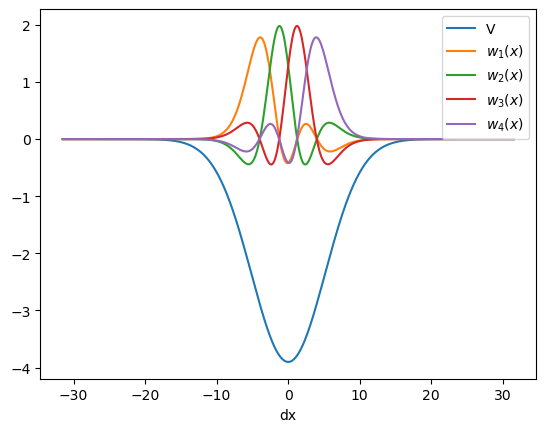

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x / dvr.lc[0], v[:, 0, 0], label='V')
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


In [6]:
from tools.integrate import simps3d
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = [x, y, z]

wf = wannier_func(X, U, dvr, W, p)
print(simps3d(wf[:, :, :, 0] * wf[:, :, :, 1], x=X))
print(simps3d(wf[:, :, :, 0] * wf[:, :, :, 2], x=X))
print(simps3d(wf[:, :, :, 0] * wf[:, :, :, 3], x=X))
print(simps3d(wf[:, :, :, 1] * wf[:, :, :, 2], x=X))
print(simps3d(wf[:, :, :, 1] * wf[:, :, :, 3], x=X))


-1.534880940948121e-08
-1.2529674130862131e-08
-3.6480702294085503e-08
-3.3553051652544283e-09
-1.2529673878676706e-08


#### 4x1 Riemann manifold optimize

In [5]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(100, 1600),
    band=1,
    dim=1,
    avg=1,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p, eig1d=False)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-3.56092389 -2.90375051 -2.29795188 -1.74647862]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
detU = 0.9999999999999998
V_i =  [-116.85947269 -145.86821691 -145.86798514 -116.85956993]
t_ij = [[ 0.         22.6476808   6.21143872  2.65345465]
 [22.6476808   0.         27.56271134  6.21132705]
 [ 6.21143872 27.56271134  0.         22.64775799]
 [ 2.65345465  6.21132705 22.64775799  0.        ]]
U_i = [4.26518509 5.12162126 5.12161358 4.26518742]


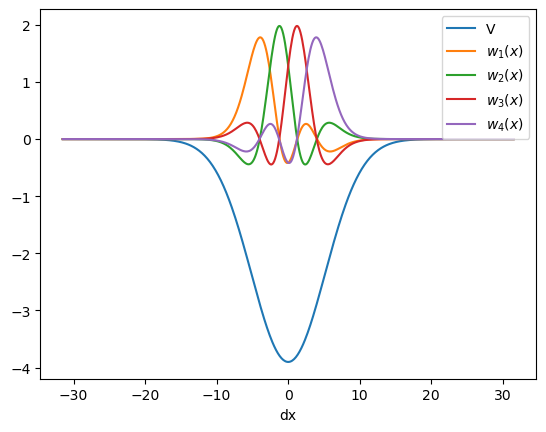

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x / dvr.lc[0], v[:, 0, 0], label='V')
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


The site order matching issue is now fixed.

## 2D DVR Wannier

lc = 400, nonphysical Wannier func

In [7]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(400, 1600),
    band=1,
    dim=2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-2.33769044 -1.96919497 -1.61360687 -1.28893511]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]
detU = 1.0
V_i =  [ -95.46249617  -64.45611051 -105.09026658  -95.46249617]
t_ij = [[ 0.          0.22621387 12.00015005  2.99725227]
 [ 0.22621387  0.          0.22233256  0.22621387]
 [12.00015005  0.22233256  0.         12.00015005]
 [ 2.99725227  0.22621387 12.00015005  0.        ]]
U_i = [5.23420491 2.30297627 6.02230222 5.23420491]


In [8]:
print(W[0].flatten() @ W[2].flatten())
print(W[0].flatten() @ W[3].flatten())
print(W[2].flatten() @ W[3].flatten())


-8.326672684689352e-17
5.551115123129134e-17
4.5102810368253935e-17


p=1 sector vectors are orthogonal.

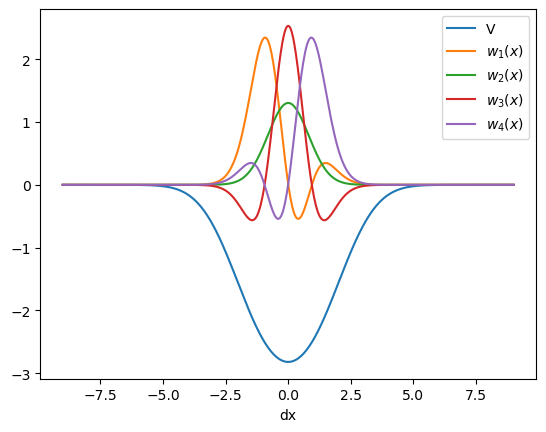

In [9]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x / dvr.lc[0], v[:, 0, 0], label='V')
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


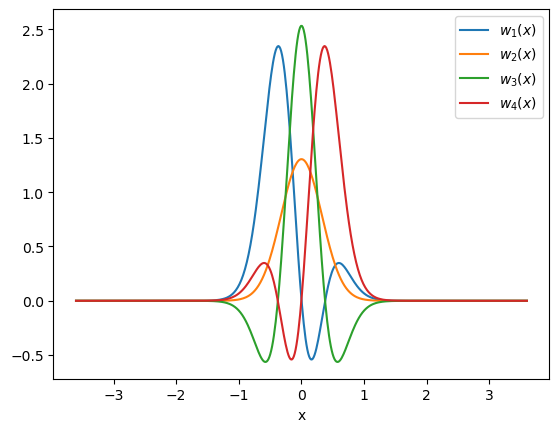

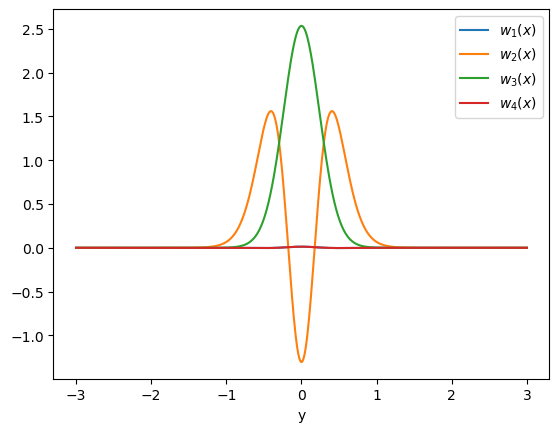

In [11]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('x')
plt.legend()

plt.figure()
x = np.array([0])
y = np.linspace(-dvr.R0[1], dvr.R0[1], 500)
z = np.array([0])
plt.plot(y,
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[0, :, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('y')
plt.legend()


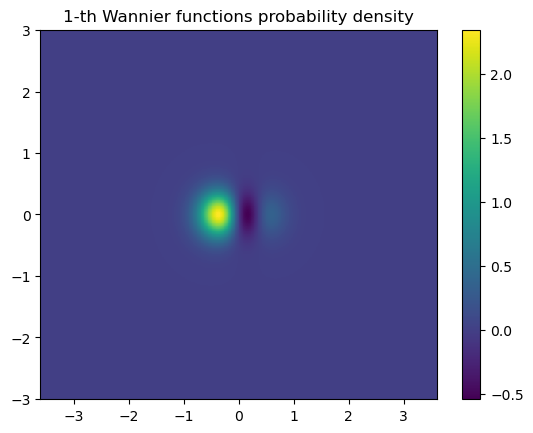

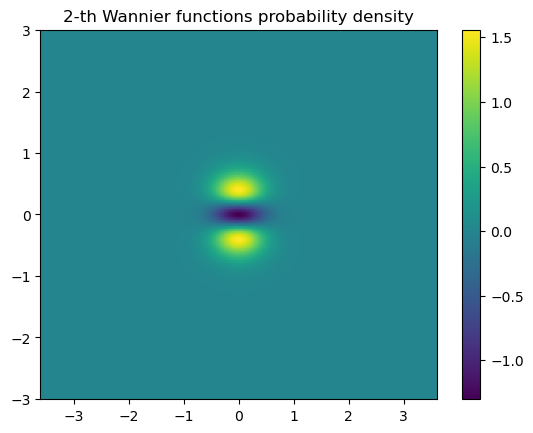

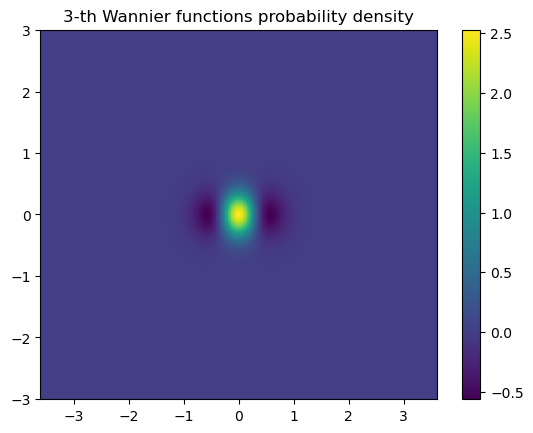

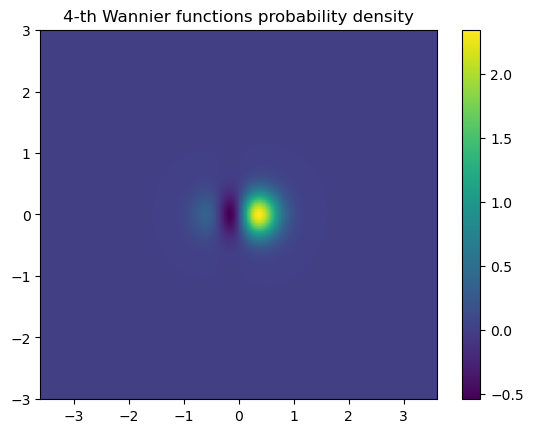

In [10]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.linspace(-dvr.R0[1], dvr.R0[1], 500)
z = np.array([0])
wx = wannier_func((x, y, z), U, dvr, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(dvr.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


In [11]:
from tools.integrate import simps3d

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.linspace(-dvr.R0[1], dvr.R0[1], 500)
z = np.array([0])


X = [x, y, z]
wf = wannier_func(X, U, dvr, W, p)
print(simps3d(wf[:, :, :, 0] * wf[:, :, :, 1], x=X))
print(simps3d(wf[:, :, :, 0] * wf[:, :, :, 2], x=X))
print(simps3d(wf[:, :, :, 0] * wf[:, :, :, 3], x=X))
print(simps3d(wf[:, :, :, 1] * wf[:, :, :, 2], x=X))
print(simps3d(wf[:, :, :, 1] * wf[:, :, :, 3], x=X))


-1.8669042802138088e-10
9.023378897496503e-12
7.342015235219816e-12
6.54733861709994e-10
-1.8669044536861564e-10


Nonzero because not all components are integrated.

lc = 500

In [12]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(500, 1600),
    band=1,
    dim=2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-2.01062645 -1.74239573 -1.46838736 -1.19656363]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
detU = 1.0000000000000009
V_i =  [-74.72105072 -85.72827842 -85.72827842 -74.72105072]
t_ij = [[ 0.         10.77816461  2.86763781  1.2457484 ]
 [10.77816461  0.         12.25561301  2.86763781]
 [ 2.86763781 12.25561301  0.         10.77816461]
 [ 1.2457484   2.86763781 10.77816461  0.        ]]
U_i = [4.6047466  5.58884211 5.58884211 4.6047466 ]


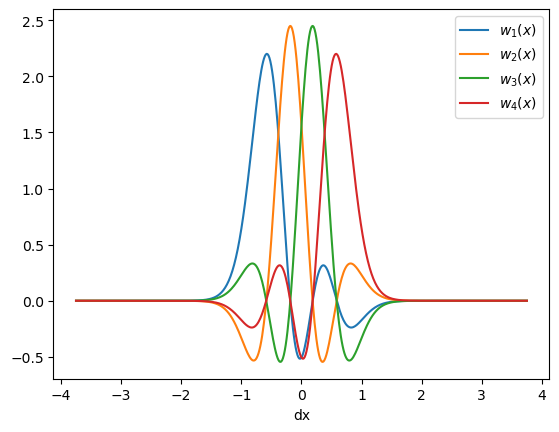

In [13]:
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


## 3D DVR Wannier

lc = 1000, nonphysical Wannier func

In [14]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(1000, 1600),
    band=1,
    dim=3,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-1.02163072 -0.97328556 -0.93709504 -0.89827258]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]
detU = -1.0
V_i =  [-48.13172222 -48.39690734 -46.85384294 -48.13172222]
t_ij = [[0.         2.16204412 0.02231302 0.53255584]
 [2.16204412 0.         0.02770626 2.16204412]
 [0.02231302 0.02770626 0.         0.02231302]
 [0.53255584 2.16204412 0.02231302 0.        ]]
U_i = [0.9495658  0.89043996 0.3322762  0.9495658 ]


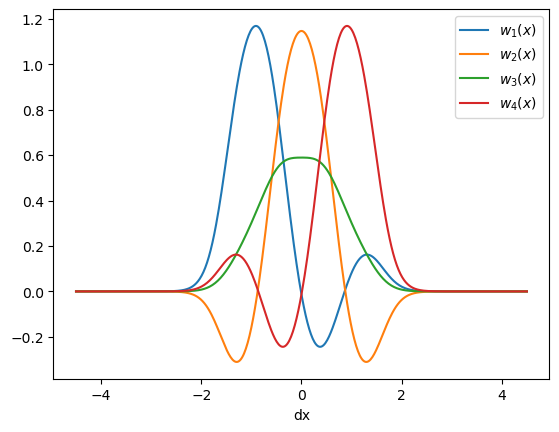

In [15]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


lc = 1400

In [16]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(1400, 1600),
    band=1,
    dim=3,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-0.73167772 -0.71583326 -0.6855766  -0.6807865 ]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
detU = 1.0000000000000013
V_i =  [-34.41501706 -35.93183484 -35.93183484 -34.41501706]
t_ij = [[0.         0.6397976  0.06836332 0.01544968]
 [0.6397976  0.         0.50041433 0.06836332]
 [0.06836332 0.50041433 0.         0.6397976 ]
 [0.01544968 0.06836332 0.6397976  0.        ]]
U_i = [1.12343617 1.05436162 1.05436162 1.12343617]


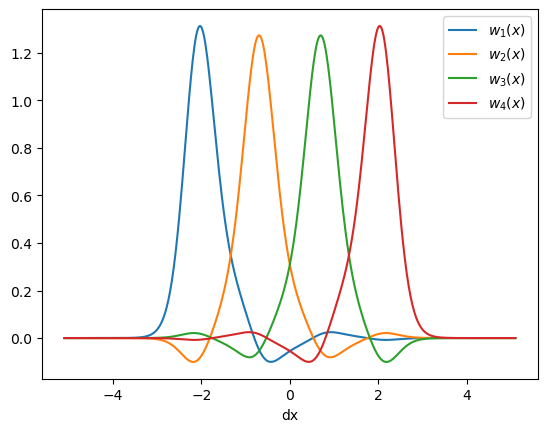

In [17]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


So the 'resolution of traps' is becoming worse with higher dimension.